In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
csv_file = "./data/stock.adj_close.csv"

rawdata = pd.read_csv(csv_file)
rawdata.head(10)

,Symbol,2018-06-01,2018-06-04,2018-06-05,2018-06-07,2018-06-08,2018-06-11,2018-06-12,2018-06-14,2018-06-15,...,2020-09-07,2020-09-08,2020-09-09,2020-09-10,2020-09-11,2020-09-14,2020-09-15,2020-09-16,2020-09-17,2020-09-18
0,A000020,11550.0,11750.0,11700.0,11650.0,11500.0,11500.0,11650.0,12000.0,11800.0,...,25550.0,23650.0,24550.0,25950.0,26750.0,26300.0,25400.0,25050.0,25300.0,25050.0
1,A000030,15500.0,15950.0,16050.0,16500.0,16600.0,16650.0,16850.0,16500.0,16100.0,...,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0,14800.0
2,A000040,2992.0,3021.0,3025.0,3069.0,3045.0,2984.0,2976.0,3033.0,3033.0,...,980.0,932.0,741.0,875.0,840.0,860.0,833.0,817.0,812.0,796.0
3,A000050,13200.0,13550.0,13600.0,13800.0,13800.0,13800.0,13650.0,13850.0,14500.0,...,11100.0,11350.0,11550.0,11500.0,11550.0,11300.0,11300.0,11050.0,10900.0,10750.0
4,A000060,20050.0,20050.0,20150.0,20050.0,20400.0,20150.0,20700.0,20950.0,20150.0,...,12700.0,12700.0,12650.0,12700.0,12800.0,13000.0,13200.0,13150.0,13150.0,13200.0
5,A000070,120000.0,123000.0,123500.0,124500.0,123500.0,125000.0,121500.0,118000.0,121000.0,...,67200.0,68000.0,66500.0,66300.0,65400.0,67500.0,66200.0,65400.0,64500.0,64400.0
6,A000080,20200.0,20400.0,20350.0,21000.0,20750.0,20850.0,20700.0,20650.0,20600.0,...,36700.0,38050.0,37050.0,37600.0,37350.0,37300.0,38500.0,37950.0,37150.0,36850.0
7,A000100,44979.0,42689.0,41406.0,41498.0,41956.0,42139.0,42414.0,41773.0,41590.0,...,65200.0,65500.0,64000.0,64500.0,66600.0,65700.0,68700.0,68400.0,66400.0,66600.0
8,A000120,148000.0,153000.0,152500.0,154000.0,154000.0,161500.0,161500.0,156500.0,152000.0,...,160000.0,156000.0,158000.0,156000.0,156500.0,158000.0,162500.0,177500.0,179500.0,182000.0
9,A000140,9360.0,9440.0,9390.0,9490.0,9510.0,9550.0,9440.0,9430.0,9420.0,...,17150.0,17600.0,17200.0,17300.0,17150.0,17000.0,17250.0,17200.0,17200.0,16700.0


In [34]:
rawdata.shape

(2274, 569)

In [35]:
rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Columns: 569 entries, Symbol to 2020-09-18
dtypes: float64(568), object(1)
memory usage: 9.9+ MB


# 전체적인 흐름 파악을 위한 날짜별 주가 평균 데이터 산출

In [36]:
# 날짜별 주가 평균 데이터 저장
price_mean_dict = {}
date_list = rawdata.columns.tolist()

for date in date_list[1:]:
    price_mean_dict[date] = rawdata[date].mean()

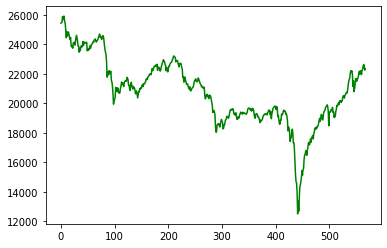

In [37]:
# 전체 주가 흐름 파악을 위한 시각화
x = np.arange(len(price_mean_dict.keys()))
y = price_mean_dict.values()

plt.plot(x, y, "g-")
plt.show()

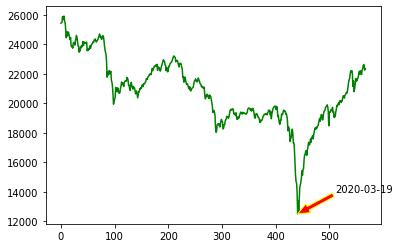

In [38]:
# 주가가 저점을 찍은 시점 날짜 표시
min_price = min(y)
min_price_index = list(y).index(min_price)
min_price_date = list(price_mean_dict.keys())[min_price_index]

plt.plot(x, y, "g-")
plt.annotate(min_price_date,
             xy=(min_price_index, min_price),
             xytext=(min_price_index + 70, min_price + 1500),
             arrowprops=dict(facecolor="red", edgecolor="yellow", headwidth=10))
plt.show()

### => 전체적인 주가 흐름상 특정 시점('20.3.19.) 전후로 일정기간 시장 변동성이 큰 폭으로 확대되었던 것으로 나타남

# 분석 방향 및 가설 설정

### 분석 방향
* 각 세부 종목별 전반적인 주가 흐름을 파악해 본 뒤,
* 장기간('18.6.1.~'20.9.18) 지속적으로 주가가 상승한 종목들(A그룹)과 그렇지 않은 종목들(B그룹)을 각각 추출해 두 그룹간 특성을 비교 분석

### 가설 설정
"시장의 주가가 저점을 찍은 시점('20.3.19.)을 기준으로 이전 한달간 두 그룹의 하락률 및 이후 한달간 두 그룹의 상승율에 유의미한 차이가 있을 것이다"

# 데이터프레임 행열 전환 후 종목별 흐름 파악 실시

In [39]:
rawdata_tr = rawdata.transpose()  # 행열 전환
rawdata_tr

,0,1,2,3,4,5,6,7,8,9,...,2264,2265,2266,2267,2268,2269,2270,2271,2272,2273
Symbol,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,...,A900310,A900340,A950110,A950130,A950140,A950160,A950170,A950180,A950190,A950200
2018-06-01,11550.0,15500.0,2992.0,13200.0,20050.0,120000.0,20200.0,44979.0,148000.0,9360.0,...,3245.0,NaN,7690.0,4970.0,6530.0,38600.0,13850.0,NaN,NaN,NaN
2018-06-04,11750.0,15950.0,3021.0,13550.0,20050.0,123000.0,20400.0,42689.0,153000.0,9440.0,...,3245.0,NaN,7700.0,4900.0,6870.0,36400.0,14250.0,NaN,NaN,NaN
2018-06-05,11700.0,16050.0,3025.0,13600.0,20150.0,123500.0,20350.0,41406.0,152500.0,9390.0,...,3240.0,NaN,7690.0,4940.0,6690.0,36350.0,14450.0,NaN,NaN,NaN
2018-06-07,11650.0,16500.0,3069.0,13800.0,20050.0,124500.0,21000.0,41498.0,154000.0,9490.0,...,3245.0,NaN,7680.0,5140.0,6950.0,38700.0,14300.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,26300.0,14800.0,860.0,11300.0,13000.0,67500.0,37300.0,65700.0,158000.0,17000.0,...,1760.0,1395.0,6960.0,28900.0,4135.0,9540.0,4195.0,13900.0,30050.0,17450.0
2020-09-15,25400.0,14800.0,833.0,11300.0,13200.0,66200.0,38500.0,68700.0,162500.0,17250.0,...,1780.0,1395.0,7010.0,29800.0,4185.0,9540.0,4070.0,13250.0,31450.0,15800.0
2020-09-16,25050.0,14800.0,817.0,11050.0,13150.0,65400.0,37950.0,68400.0,177500.0,17200.0,...,1745.0,1385.0,6990.0,31900.0,4200.0,9540.0,4045.0,13350.0,31750.0,15100.0
2020-09-17,25300.0,14800.0,812.0,10900.0,13150.0,64500.0,37150.0,66400.0,179500.0,17200.0,...,1710.0,1355.0,7030.0,30800.0,4155.0,8010.0,4015.0,13550.0,31200.0,14700.0


In [40]:
# 기존 columns을 첫번째 행 내용으로 일괄 변경(inplace옵션으로 해당 데이터프레임에 바로 적용) 후 첫번째 행 삭제
rawdata_tr.rename(columns=rawdata_tr.iloc[0], inplace=True)
rawdata_tr.drop(rawdata_tr.index[0], inplace=True)
rawdata_tr

,A000020,A000030,A000040,A000050,A000060,A000070,A000080,A000100,A000120,A000140,...,A900310,A900340,A950110,A950130,A950140,A950160,A950170,A950180,A950190,A950200
2018-06-01,11550.0,15500.0,2992.0,13200.0,20050.0,120000.0,20200.0,44979.0,148000.0,9360.0,...,3245.0,NaN,7690.0,4970.0,6530.0,38600.0,13850.0,NaN,NaN,NaN
2018-06-04,11750.0,15950.0,3021.0,13550.0,20050.0,123000.0,20400.0,42689.0,153000.0,9440.0,...,3245.0,NaN,7700.0,4900.0,6870.0,36400.0,14250.0,NaN,NaN,NaN
2018-06-05,11700.0,16050.0,3025.0,13600.0,20150.0,123500.0,20350.0,41406.0,152500.0,9390.0,...,3240.0,NaN,7690.0,4940.0,6690.0,36350.0,14450.0,NaN,NaN,NaN
2018-06-07,11650.0,16500.0,3069.0,13800.0,20050.0,124500.0,21000.0,41498.0,154000.0,9490.0,...,3245.0,NaN,7680.0,5140.0,6950.0,38700.0,14300.0,NaN,NaN,NaN
2018-06-08,11500.0,16600.0,3045.0,13800.0,20400.0,123500.0,20750.0,41956.0,154000.0,9510.0,...,3180.0,NaN,7680.0,5280.0,6740.0,40200.0,14150.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-14,26300.0,14800.0,860.0,11300.0,13000.0,67500.0,37300.0,65700.0,158000.0,17000.0,...,1760.0,1395.0,6960.0,28900.0,4135.0,9540.0,4195.0,13900.0,30050.0,17450.0
2020-09-15,25400.0,14800.0,833.0,11300.0,13200.0,66200.0,38500.0,68700.0,162500.0,17250.0,...,1780.0,1395.0,7010.0,29800.0,4185.0,9540.0,4070.0,13250.0,31450.0,15800.0
2020-09-16,25050.0,14800.0,817.0,11050.0,13150.0,65400.0,37950.0,68400.0,177500.0,17200.0,...,1745.0,1385.0,6990.0,31900.0,4200.0,9540.0,4045.0,13350.0,31750.0,15100.0
2020-09-17,25300.0,14800.0,812.0,10900.0,13150.0,64500.0,37150.0,66400.0,179500.0,17200.0,...,1710.0,1355.0,7030.0,30800.0,4155.0,8010.0,4015.0,13550.0,31200.0,14700.0


In [41]:
# 특정 시점 기준의 종목별 주가 추이 분석을 위해 해당 정보 딕셔너리로 저장
code_list = rawdata_tr.columns.tolist()
date_list = rawdata_tr.index.tolist()
g_rate_dict = {}
start_date = "2020-03-19"  # 우선, 기준 시점을 2020년 3월 19일로 설정
end_date = "2020-09-18"

for i in range(len(code_list)):
    code = code_list[i]
    g_rate = rawdata_tr[code][date_list.index(end_date)] / rawdata_tr[code][date_list.index(start_date)]
    g_rate_dict[code] = g_rate

In [42]:
# 분석을 위해 데이터프레임 형태로 저장 후 전체적인 분포 현황 등 전반적으로 파악
g_rate_df = pd.DataFrame(data=g_rate_dict.values(), index=g_rate_dict.keys(), columns=["Growth_Rate"])
g_rate_df

,Growth_Rate
A000020,5.025075
A000030,1.000000
A000040,1.804989
A000050,1.490985
A000060,1.437908
...,...
A950160,0.839623
A950170,1.271160
A950180,1.063241
A950190,NaN


In [43]:
g_rate_df.describe()

,Growth_Rate
count,2231.000000
mean,2.052368
std,1.243224
min,0.013055
25%,1.404261
50%,1.786385
75%,2.347997
max,29.954614


array([[<AxesSubplot:title={'center':'Growth_Rate'}>]], dtype=object)

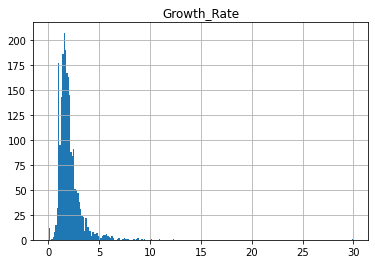

In [44]:
g_rate_df.hist(bins=int(2231/10))

<AxesSubplot:>

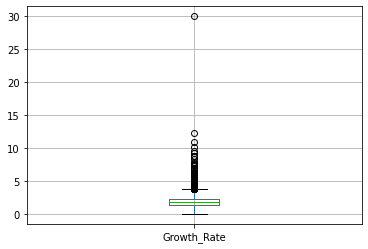

In [45]:
g_rate_df.boxplot(column=["Growth_Rate"])

### => 전반적으로 쏠림 현상과 함께 특정 소수 종목의 성장률이 두드러진 것을 확인

# 종목별 세부적인 주가 상승율 추이 확인을 위한 시각화(=> A그룹, B그룹 추출)

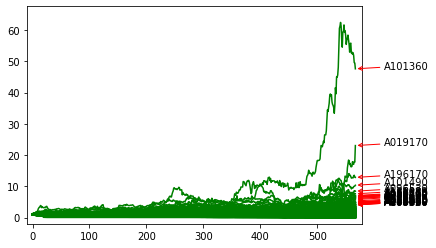

In [46]:
# 종목별 전반적인 주가 상승율 파악을 위한 시각화 : 종목별 변화율(시작일 주가를 1.0으로 변환) 그래프 출력
# 주가 상승률 기준 A그룹 및 B그룹 code 추출 함께 실시
top_code = []
bottom_code = []
date_arr = rawdata_tr.index.tolist()
start_date = "2018-06-01"  # 2018년 6월 1일 기준으로 설정
x = np.arange(len(date_arr))
y_height = 0.0

for i in range(len(rawdata_tr.columns)):
    code = rawdata_tr.columns[i]
    start_price = rawdata_tr[code][date_arr.index(start_date)]
    y = rawdata_tr[code] / start_price
    plt.plot(x, y, "g-")
    if y[-1] > 4.0:
        plt.annotate(str(code),
                    xy=(x[-1], y[-1]),
                    xytext=(x[-1]+50, y[-1]),
                    arrowprops=dict(arrowstyle="->", lw=1.0, color="r"))
        top_code.append(str(code))
        y_height = max(y[-1], y_height)
    elif y[-1] < 0.90 and y[-1] > 0.87:
        bottom_code.append(str(code))
plt.axis([date_arr.index(start_date) -10,len(x) + 10, -2, y_height + 20])
plt.show()

In [47]:
print(top_code)  # 전체 기간(2018.6.1 ~ 2020.9.18) 상승율 300%(4배) 초과한 종목 Code 추출 확인 => A그룹

['A008350', 'A011000', 'A019170', 'A026890', 'A032500', 'A051160', 'A058110', 'A059090', 'A060250', 'A065370', 'A078070', 'A078130', 'A088290', 'A088800', 'A094860', 'A096530', 'A101360', 'A101490', 'A104460', 'A109820', 'A131370', 'A138080', 'A139670', 'A143160', 'A196170', 'A205470', 'A214870', 'A225220', 'A230360', 'A253840', 'A256940', 'A950130']


In [48]:
print(bottom_code)  # 전체 기간(2018.6.1 ~ 2020.9.18) 상승율 -13%(0.87배) ~ -10%(0.9배)인 종목 Code 추출 확인 => B그룹

['A000240', 'A002760', 'A003610', 'A004130', 'A004710', 'A005850', 'A005960', 'A006060', 'A006580', 'A006980', 'A007070', 'A012800', 'A013120', 'A013700', 'A015360', 'A018700', 'A021240', 'A023790', 'A024090', 'A027740', 'A028260', 'A031430', 'A035460', 'A038110', 'A042660', 'A053270', 'A054410', 'A057540', 'A060480', 'A089470', 'A093380', 'A104830', 'A128660', 'A130660', 'A133820', 'A136510', 'A204320', 'A214390', 'A273060', 'A281820', 'A900250']


### ※ B그룹 상승율 "-13%(0.87배) ~ -10%(0.9배)" 선정기준 설정에 대한 근거 :
    => 해당 기간 전체 시장의 성장율 산출 후, 시장 성장율 수준에 머무른 종목들로 선정함

In [49]:
# 해당 기간 전체 시장 성장율 산출
market_rate = price_mean_dict["2020-09-18"] / price_mean_dict["2018-06-01"]
print("%.3f"%(market_rate))

0.878


# 추출한 A그룹, B그룹별 분석 실시

In [50]:
# A그룹, B그룹 데이터 저장
group_a = rawdata_tr[top_code]
group_b = rawdata_tr[bottom_code]

In [51]:
# 시장 전체의 변화율(시작일 주가를 1.0으로 변환) 데이터 저장
market_df = pd.DataFrame([price_mean_dict])
market_df = market_df.transpose()
market_df.columns = ["Market"]
market_df["Market"] = market_df["Market"] / market_df["Market"][0]
market_df

,Market
2018-06-01,1.000000
2018-06-04,1.000964
2018-06-05,1.002269
2018-06-07,1.017542
2018-06-08,1.010082
...,...
2020-09-14,0.885404
2020-09-15,0.889945
2020-09-16,0.885366
2020-09-17,0.874879


In [52]:
# 그래프 출력 함수 정의 => 시작 및 종료일자 파라미터값 설정에 따른 종목별 주가 흐름을 손쉽게 파악하기 위함
def draw_linegraph_with_market(df, start_date="2020-03-19", end_date="2020-09-18", line="g-", y_height_buf=[-1, 1]):
    date_arr = df.index.tolist()
    x = np.arange(len(date_arr))
    y_height = 0.0
    
    for i in range(len(df.columns)):
        code = df.columns[i]
        start_price = df[code][date_arr.index(start_date)]
        y = df[code] / start_price
        plt.plot(x, y, line)
        # 종목별 코드 표시 주석 삽입
        plt.annotate(str(code),
                    xy=(x[date_arr.index(end_date)], y[date_arr.index(end_date)]),
                    xytext=(x[date_arr.index(end_date)]+5, y[date_arr.index(end_date)]),
                    arrowprops=dict(arrowstyle="->", lw=1.0, color="r"))
        y_height = max(y[date_arr.index(end_date)], y_height)
    plt.axis([date_arr.index(start_date), date_arr.index(end_date), 0 + y_height_buf[0], y_height + y_height_buf[1]])
    # 특정 시점 날짜 표시 주석 삽입
    t_date = "2020-03-19"
    plt.annotate(t_date,
             xy=(x[date_arr.index(t_date)], 0),
             xytext=(x[date_arr.index(t_date)], y_height * -0.3),
             arrowprops=dict(facecolor="red", edgecolor="yellow", headwidth=10))
    # 시장 전체의 주가 변화율 붉은색 라인으로 표시
    y = market_df["Market"] / market_df["Market"][date_arr.index(start_date)]
    plt.plot(x, y, "r-")
    plt.annotate("Market_Price",
                 xy=(date_arr.index(start_date) + 5, y[date_arr.index(start_date) + 5]),
                 xytext=(date_arr.index(start_date) + 6, market_df["Market"][date_arr.index(start_date) + 5] + y_height * 0.5),
         arrowprops=dict(facecolor="red", edgecolor="yellow", headwidth=10))
    plt.show()

# 2020년 3월 19일 기준, 시장 변동성이 가장 컸던 두달간(2.19.~4.20.)의 전체적인 주가 흐름 확인

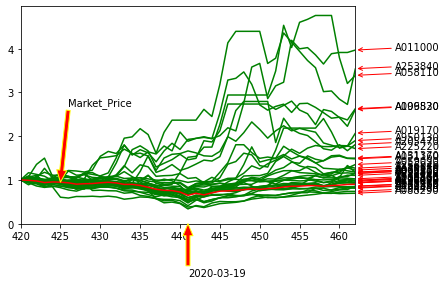

In [53]:
# A그룹 주가 흐름
draw_linegraph_with_market(group_a, start_date="2020-02-19", end_date="2020-04-20", y_height_buf=[0, 1])

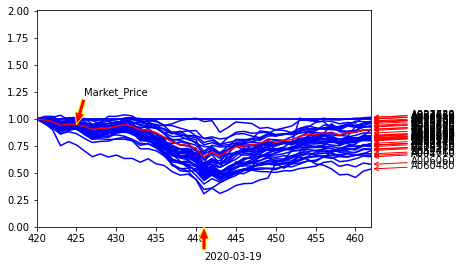

In [54]:
# B그룹 주가 흐름
draw_linegraph_with_market(group_b, start_date="2020-02-19", end_date="2020-04-20", line="b-", y_height_buf=[0, 1])

### => 그래프 출력 결과, 두 그룹간 해당 기간('20.2.19. ~ '20.4.20.)의 주가 흐름 특성에 유의미한 차이가 있음을 확인

# 2020년 3월 19일 기준, 이전(2.19. ~ 3.19.)과 이후(3.19. ~ 4.20.)의 변화율 각각 비교

In [55]:
# 전체 시장 및 A그룹, B그룹 각각의 평균 데이터 산출
mean_a = {}
for i in range(len(group_a.index)):
    mean_a[group_a.index[i]] = group_a.iloc[i].mean()
mean_b = {}
for i in range(len(group_b.index)):
    mean_b[group_b.index[i]] = group_b.iloc[i].mean()
    
group_df = pd.DataFrame([price_mean_dict, mean_a, mean_b])
group_df = group_df.transpose()
group_df.columns = ["Mean_Market", "Mean_A", "Mean_B"]
group_df

,Mean_Market,Mean_A,Mean_B
2018-06-01,25426.545591,6193.62500,18867.390244
2018-06-04,25451.045477,6184.43750,19262.073171
2018-06-05,25484.249875,6233.31250,19212.975610
2018-06-07,25872.576136,6334.40625,19423.878049
2018-06-08,25682.891663,6222.40625,19180.317073
...,...,...,...
2020-09-14,22512.764109,43519.53125,17035.365854
2020-09-15,22628.224427,43958.12500,16997.926829
2020-09-16,22511.795505,44607.50000,16841.268293
2020-09-17,22245.163292,44162.50000,16762.780488


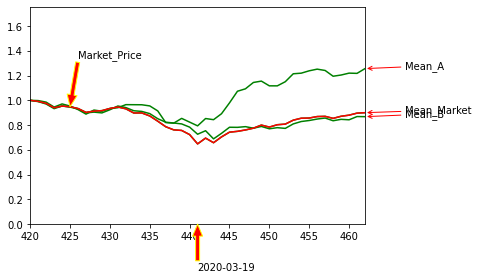

In [56]:
# 위에서 작성한 함수에 적용해 전체적인 그래프 모양 확인
draw_linegraph_with_market(group_df, start_date="2020-02-19", end_date="2020-04-20", y_height_buf=[0, 0.5])

In [57]:
# 그룹별 변화율 산출을 위한 함수 정의
def get_g_rate(col_name, start_date, end_date):
    date_arr = group_df.index.tolist()
    start_price = group_df[col_name][date_arr.index(start_date)]
    end_price = group_df[col_name][date_arr.index(end_date)]
    g_rate = end_price / start_price
    return g_rate

In [58]:
##'20.2.19. ~'20.3.19.(이전 한달) 기간 그룹별 변화율 산출
market_before = get_g_rate("Mean_Market", "2020-02-19", "2020-03-19")
a_before = get_g_rate("Mean_A", "2020-02-19", "2020-03-19")
b_before = get_g_rate("Mean_B", "2020-02-19", "2020-03-19")

# '20.3.19. ~'20.4.20.(이후 한달) 기간 그룹별 변화율 산출
market_after = get_g_rate("Mean_Market", "2020-03-19", "2020-04-20")
a_after = get_g_rate("Mean_A", "2020-03-19", "2020-04-20")
b_after = get_g_rate("Mean_B", "2020-03-19", "2020-04-20")

df = pd.DataFrame({"Before" : [market_before, a_before, b_before],
                   "After" : [market_after, a_after, b_after]},
                  index=["Market", "A", "B"])
df

,Before,After
Market,0.648146,1.389024
A,0.793911,1.582593
B,0.726248,1.195333


## '20.2.19. ~ '20.3.19.(이전 한달) 기간, 그룹별 변화율 비교

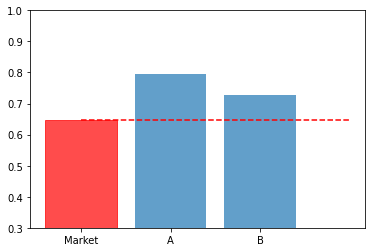

In [59]:
x = df.index
y = df["Before"]

bar = plt.bar(x, y, align="center", alpha=0.7)
bar[0].set_color('r')
plt.plot([0, 3], [y[0], y[0]], "r--")
plt.ylim(0.3, 1.0)
plt.show()

### => A그룹이 상대적으로 적게 하락하긴 했으나, A그룹, B그룹 모두 시장 평균(-35%)을 상회하는 기록을 보임

## '20.3.19. ~ '20.4.20.(이후 한달) 기간, 그룹별 변화율 비교

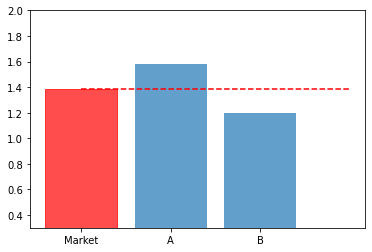

In [60]:
x = df.index
y = df["After"]

bar = plt.bar(x, y, align="center", alpha=0.7)
bar[0].set_color('r')
plt.plot([0, 3], [y[0], y[0]], "r--")
plt.ylim(0.3, 2.0)
plt.show()

### => 이전 한달 기간의 그래프와 비교했을 때 두 그룹간 차이가 더 분명하게 나타남. 시장 평균이 39% 상승한 시점에 A그룹은 60% 가까이 상승한 것에 반해, B그룹은 20% 수준 상승에 그친 기록을 보임

# 종합
 * 장기적으로 수익률이 꾸준히 높은 종목들은 시장에 큰 변동성이 찾아왔을 때에도 타종목에 비해 하락률은 낮고, 상승율은 높은 경향이 있는 것으로 나타남
 * 특히, 시장이 하락하는 시기보다는 저점을 통과 후 상승하는 시기가 왔을 때 그 차이가 두드러짐 => 두 그룹간 유의미한 차이 확인

### => 위 분석 결과에 따라, 아래와 같은 2가지 결론을 도출
1) 만약 추후 시장이 크게 하락하는 시기가 다시 한번 올 경우, 과거 1년 이상 장기간 상승해 온 종목이 상대적으로 하락률이 낮을 것으로 전망

2) 이후 하락이 둔화되고 타종목 대비 빠르게 이전 주가 수준을 회복하는 종목이 이후 6개월 이상의 장기적인 시점에서도 더 높은 주가 상승율을 기록할 가능성이 높음

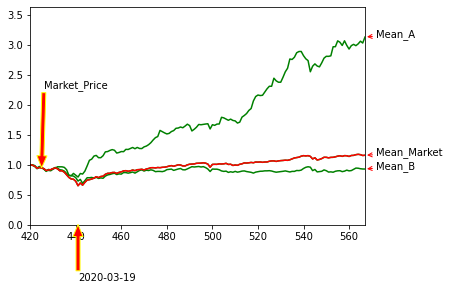

In [61]:
# ※[첨부] 변동성 시기(2.19.~4.20.) 이후, 2020년 9월 18일까지의 장기적인 시점의 그룹별 추이
draw_linegraph_with_market(group_df, start_date="2020-02-19", end_date="2020-09-18", y_height_buf=[0, 0.5])